# **Analysis of the data**

## **Preliminary steps**

In [1]:
### PACKAGES

import pandas as pd
import numpy as np

In [2]:
### FUNCTIONS

from src.libs import preprocessing, visualization

from src.configs import names

In [3]:
pd.set_option("display.max_columns", None)

## **RAW DATA**

In [4]:
### LOAD DATA

df_train, _ = preprocessing.load_data(local=True, type="train")

Loading data from local
Data loading done in 0.41 seconds


In [5]:
### CHECK SHAPE

df_train.shape

(22930, 3)

In [6]:
### CHECK STRUCTURE

df_train.sample(n=5)

,title,abstract,label
9018,Analysis of chikungunya virus proteins reveals...,RNAi pathway is an antiviral defence mechanism...,0
9996,Understanding Objectivity in Research Reported...,Based on a website search with the keyword “ob...,0
2701,"Minds, brains, and hearts: an empirical study ...","\n\nThis article proposes the study of Minds, ...",1
17109,Outcomes of hematopoietic stem cell transplant...,\n\nThis paper presents an analysis of risk fa...,1
21068,Design principles of the ESCRT-III Vps24-Vps2 ...,ESCRT-III polymerization is required for all e...,0


In [7]:
### CHECK MISSING VALUES

df_train.isnull().sum()

title       0
abstract    0
label       0
dtype: int64

In [8]:
### CHECK DUPLICATES

int(df_train.duplicated().sum())

0

In [9]:
### CHECK DATA TYPES

df_train.dtypes

title       object
abstract    object
label        int64
dtype: object

In [10]:
### CHECK REPARTITION OF TARGET VARIABLE

df_train[names.LABEL].value_counts()

label
1    11465
0    11465
Name: count, dtype: int64

In [11]:
### CHECK RANDOM TITLE

df_train[names.ABSTRACT][np.random.randint(0, len(df_train))]

'BACKGROUND: Hepatic complications of hepatitis C virus (HCV), including fibrosis and cirrhosis are accelerated in human immunodeficiency virus (HIV)-infected individuals. Although, liver biopsy remains the gold standard for staging HCV-associated liver disease, this test can result in serious complications and is subject to sampling errors. These challenges have prompted a search for non-invasive methods for liver fibrosis staging. To this end, we compared serum proteome profiles at different stages of fibrosis in HIV/HCV co- and HCV mono-infected patients using surface-enhanced laser desorption ionization time-of-flight mass spectrometry (SELDI-TOF MS). METHODS: Sera from 83 HIV/HCV co- and 68 HCV mono-infected subjects in 4 stages of fibrosis were tested. Sera were fractionated, randomly applied to protein chip arrays (IMAC, CM10 and H50) and spectra were generated at low and high laser intensities. RESULTS: Sixteen biomarkers achieved a p value < 0.01 (ROC values > 0.75 or < 0.25) 

In [12]:
### CHECK RANDOM TEXT

df_train[names.ABSTRACT][np.random.randint(0, len(df_train))]

'\n\nThis study aims to explore the association between human herpes virus (HHV) co-infection mortality and HIV negative patients with Pneumocystis jirovecii pneumonia (PJP). In an era of increased globalization, multi-drug resistant infections and complex forms of infective diseases, it is crucial to understand the importance of studying this complicated area. AIDS led by PJP has been a woldwide threat and continues to spread among immunosuppressed individuals. Understanding the risk factors associated with these types of infection is key in making informed treatments decisions for those living with them or at risk of developing one. The current article discusses a retrospective cohort using medical coding data from 2013 through 2016, drawn from over 9000 cases from 5 provinces across China which looked into HHV co-infections as a potential determinant for higher mortality rates in HIV–seronegative patients infected with PJP. Our findings indicate that HHV co-infection may be positive

In [13]:
### CHECK NUMBER OF LINES WITH "\n"

df_train[names.ABSTRACT].str.count("\n").value_counts()

abstract
0     11465
2      9807
4       715
3       549
6       230
5        65
8        57
7        24
10        8
9         6
11        2
13        1
12        1
Name: count, dtype: int64

## **CLEAN DATA**

In [14]:
df_train_clean = preprocessing.clean_dataset_1(df=df_train)

In [15]:
### CHECK NUMBER OF LINES WITH "\n"

df_train_clean[names.TEXT].str.count("\n").value_counts()


text
0    22930
Name: count, dtype: int64

## **PLOTS**

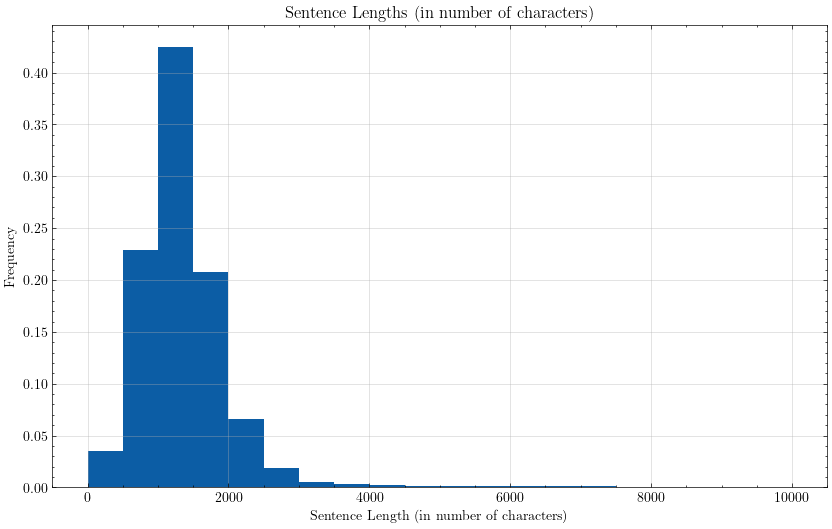

In [16]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (CHARACTERS)

sentence_lengths_chars = np.array(df_train_clean[names.TEXT].str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_chars, type="characters"
)

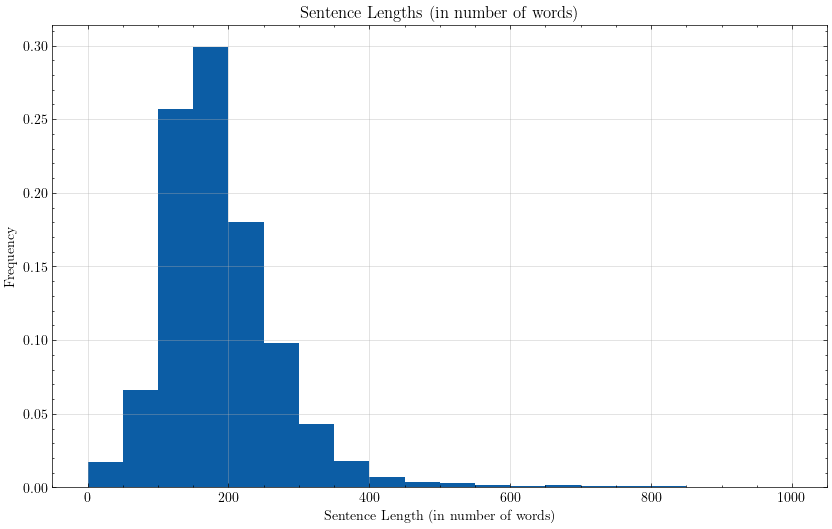

In [17]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (WORDS)

sentence_lengths_words = np.array(df_train_clean[names.TEXT].str.split().str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_words, type="words"
)

In [18]:
### PLOT WORDCLOUD FOR EACH TEXT

texts = df_train_clean[names.TEXT].to_numpy()
labels = df_train_clean[names.LABEL].to_numpy()

visualization.plot_wordcloud_slider(texts=texts, labels=labels)


interactive(children=(IntSlider(value=0, description='ID', max=22929), Output()), _dom_classes=('widget-intera…